<a href="https://colab.research.google.com/github/NeoMorpheus99/AI-ML/blob/main/Heart_Disease_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/Dataset

/content/drive/MyDrive/Colab Notebooks/Dataset


### Importing the required library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Data Loading and Preprocessing

In [4]:
data = pd.read_csv('Heart_Disease_Prediction.csv')

In [5]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
# checking for any null values in the data set
data.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
data.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [8]:
#information regarding the data set
data.info()
print(data.shape) # checking the dimension of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
data.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


### Visualizing the data


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
encoder = LabelEncoder()
data['Heart Disease']= encoder.fit_transform(data['Heart Disease'])

In [12]:
data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [13]:
### corelation plot

In [14]:
import seaborn as sb

<Axes: >

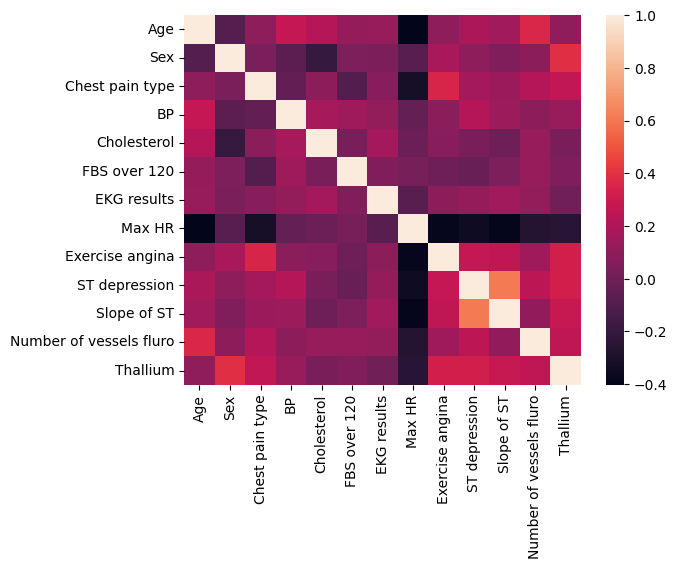

In [15]:
#sb.heatmap(data.drop(columns ='Heart Disease').corr())

In [16]:
# separating numberical and categorical data
name = data.columns
num_var = ['Age', 'BP', 'Cholesterol', 'Max HR', 'Heart Disease'] #Numerical valees
cat_var = [item for item in name if item not in num_var] #Categorical Values

num_var_data = data[num_var]
num_var_data = num_var_data.drop('Heart Disease', axis=1)
num_var_data.describe()

,Age,BP,Cholesterol,Max HR
count,270.000000,270.000000,270.000000,270.000000
mean,54.433333,131.344444,249.659259,149.677778
std,9.109067,17.861608,51.686237,23.165717
min,29.000000,94.000000,126.000000,71.000000
25%,48.000000,120.000000,213.000000,133.000000
50%,55.000000,130.000000,245.000000,153.500000
75%,61.000000,140.000000,280.000000,166.000000
max,77.000000,200.000000,564.000000,202.000000


In [17]:
num_var_data.corr()

,Age,BP,Cholesterol,Max HR
Age,1.000000,0.273053,0.220056,-0.402215
BP,0.273053,1.000000,0.173019,-0.039136
Cholesterol,0.220056,0.173019,1.000000,-0.018739
Max HR,-0.402215,-0.039136,-0.018739,1.000000


<Axes: >

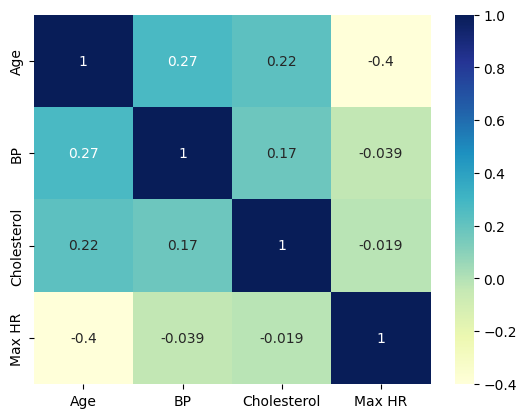

In [18]:
sb.heatmap(num_var_data.corr(), cmap="YlGnBu", annot=True)

Findings from the above graph

1. No significant outliers
2. No significant correlation among numeric variables

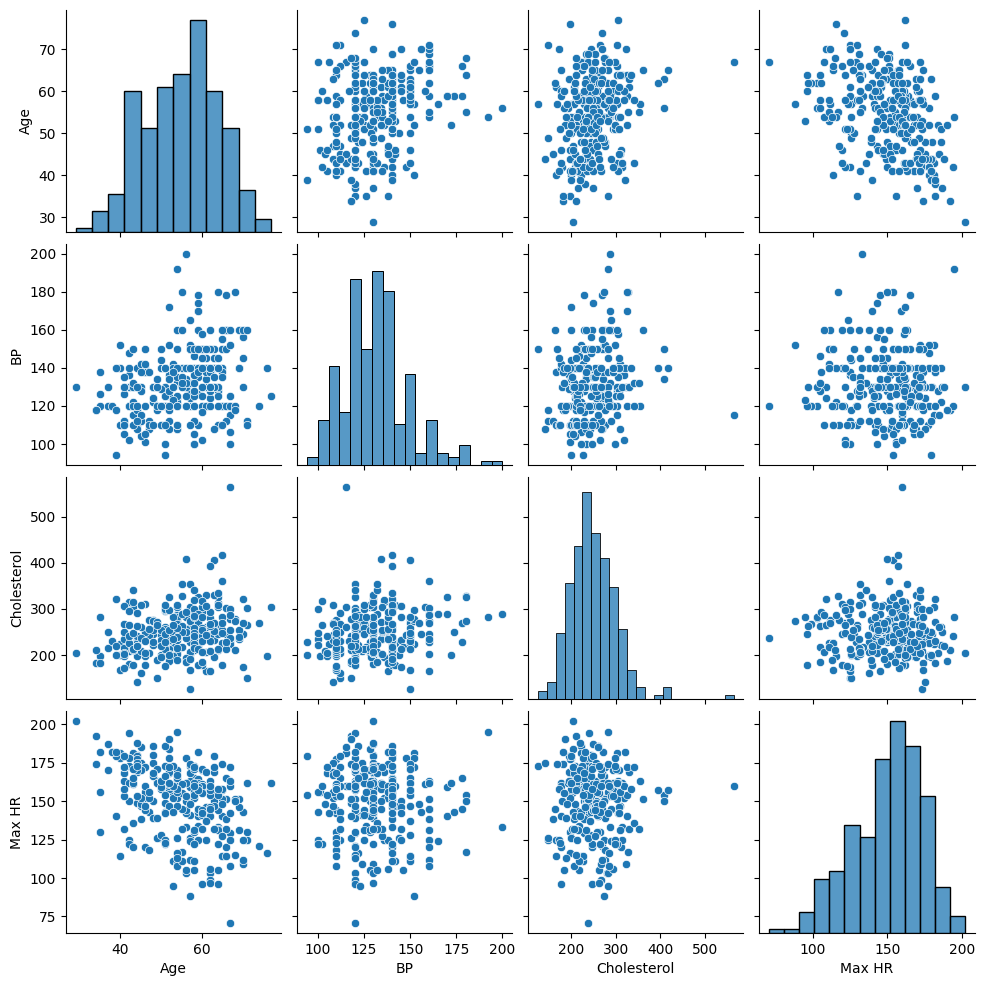

In [19]:
sb.pairplot(num_var_data)

Finding
1. No distinct pattern is observed in scatterplot
2. A potential outlier, with cholesterol value greater than 500 is checked and observed to be usual

In [20]:
num_var_data[num_var_data['Cholesterol'] > 500] #outlier data

,Age,BP,Cholesterol,Max HR
1,67,115,564,160


### Splitteing the Feature to train the model

In [21]:
X= data.drop('Heart Disease', axis =1)
Y= data['Heart Disease']

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=10)

### Training the model

#### Using Logistic Regression

In [23]:
model = LogisticRegression(max_iter=1000)
model

LogisticRegression(max_iter=1000)

In [24]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

### Evaluating the model

In [25]:
X_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(X_train_pred,Y_train)
print(training_accuracy)

0.8564814814814815


In [26]:
X_test_pred = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print(test_data_accuracy)

0.8518518518518519


In [27]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_pred = X_test_pred, y_true = Y_test)
print(error)

0.14814814814814814


In [28]:
#R-squared =  a number between 0 and 1 that measures how well a statistical model predicts an outcome
r_sq = model.score(X, Y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8555555555555555


### KNN classificaition


In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
classifier = KNeighborsClassifier(n_neighbors = 9, p = 2, metric = 'euclidean')
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [36]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0])

In [38]:
print(accuracy_score(Y_test,y_pred))

0.8703703703703703


### Testing the model with user input

In [29]:
input_data_1 =(59,1,4,110,239,0,2,142,1,1.2,2,1,7)
input_data_2 =(67,0,3,115,564,0,2,160,0,1.6,2,0,7)
# change the input data to a numpy array
input_data_1_as_numpy_array = np.asarray(input_data_1)
input_data_2_as_numpy_array = np.asarray(input_data_2)

# reshape the numpy array as we are predicting for only on instance
input_data_1_reshaped =input_data_1_as_numpy_array.reshape(1,-1)
input_data_2_reshaped =input_data_2_as_numpy_array.reshape(1,-1)
prediction_1 = model.predict(input_data_1_reshaped)
prediction_2 = model.predict(input_data_2_reshaped)

lis=[]
lis.append(prediction_1)
lis.append(prediction_2)

for i in range(len(lis)):
    if(lis[i] == 0):
        print("The Person",i+1,"does not have a Heart Disease\n")
    else:
        print("The Person", i+1, "has a Heart Disease\n")

The Person 1 has a Heart Disease

The Person 2 has a Heart Disease



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
